# Entree Task: Implementing Your Own Neural Networks from Scratch

In [4]:
import math
import numpy as np
from matplotlib import pyplot as plt # for graphics


## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [5]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        ########## Code start  ##########
        self.stored_X = X
        return X @ self.W
        
        ##########  Code end   ##########
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        ########## Code start  ##########
        self.W_grad = self.stored_X.T @ Y_grad
        return Y_grad @ self.W.T
        ##########  Code end   ##########

## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [6]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[ 0.12886674 -0.27329106 -2.62930584]]
Numerical gradient: [[ 0.12886674 -0.27329106 -2.62930584]]
Error:  8.876532842094775e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [7]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        self.stored_X = X
        Y = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Y[i][j] = max(0, X[i][j])
        
        return Y
                
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########
        grad = np.zeros(Y_grad.shape)
        for i in range(self.stored_X.shape[0]):
            for j in range(self.stored_X.shape[1]):
                if (self.stored_X[i][j] > 0):
                    grad[i][j] = Y_grad[i][j]
                else:
                    grad[i][j] = 0  
        
        return grad

        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [8]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.46025087 0.18790112 0.71212611]]
Numerical gradient: [[0.46025087 0.18790112 0.71212611]]
Error:  1.3566592294012025e-11
Correct backward. Congratulations!


## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [9]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        self.stored_diff = prediction - groundtruth
        sumSquare = np.sum(np.square(prediction - groundtruth))
        return sumSquare/prediction.shape[0]
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        return (2/self.stored_diff.shape[0]) * self.stored_diff
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [10]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        ########## Code start  ##########
        self.layers = []

        for layer in layers_arch:
            if layer[0] == 'Linear':
                self.layers.append(LinearLayer(layer[1][0], layer[1][1]))
            else:
                self.layers.append(ReLU())
            
        ##########  Code end   ##########
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
        
        curr_x = X
        for i in range(len(self.layers)):
            curr_x = self.layers[i].forward(curr_x)
        
        return curr_x

        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
        curr_y_grad = Y_grad
        for i in range(len(self.layers)-1, -1, -1):
            curr_y_grad = self.layers[i].backward(curr_y_grad)
        
        return curr_y_grad
            
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [11]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))
    

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            
            
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [12]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  0.617118547644125  | Test loss :  0.5622454921299812
Epoch:  2 / 200  | Train loss:  0.5570564378052139  | Test loss :  0.5081067824169827
Epoch:  3 / 200  | Train loss:  0.5039362906789453  | Test loss :  0.46032526774996413
Epoch:  4 / 200  | Train loss:  0.45704310122310177  | Test loss :  0.4182367799009119
Epoch:  5 / 200  | Train loss:  0.4171982939782158  | Test loss :  0.38550541601941546
Epoch:  6 / 200  | Train loss:  0.3865412764103668  | Test loss :  0.3581048731495997
Epoch:  7 / 200  | Train loss:  0.3592689588376993  | Test loss :  0.33343201029675185
Epoch:  8 / 200  | Train loss:  0.33470062766859004  | Test loss :  0.31125785569558184
Epoch:  9 / 200  | Train loss:  0.312609976957543  | Test loss :  0.2913602888825693
Epoch:  10 / 200  | Train loss:  0.29277931975931765  | Test loss :  0.27354679632619194
Epoch:  11 / 200  | Train loss:  0.2750093078071141  | Test loss :  0.257622529530386
Epoch:  12 / 200  | Train loss:  0.259112160988

Epoch:  95 / 200  | Train loss:  0.13583242262048614  | Test loss :  0.1372260231758001
Epoch:  96 / 200  | Train loss:  0.13583232633524617  | Test loss :  0.13722765014647265
Epoch:  97 / 200  | Train loss:  0.13583202885417392  | Test loss :  0.13722894380927067
Epoch:  98 / 200  | Train loss:  0.13583189892491215  | Test loss :  0.137230158792741
Epoch:  99 / 200  | Train loss:  0.13583178659549253  | Test loss :  0.13723129923298072
Epoch:  100 / 200  | Train loss:  0.13583168951964725  | Test loss :  0.13723236914369433
Epoch:  101 / 200  | Train loss:  0.13583160566133884  | Test loss :  0.13723337240372632
Epoch:  102 / 200  | Train loss:  0.13583153325392497  | Test loss :  0.13723431274816048
Epoch:  103 / 200  | Train loss:  0.13583147076468283  | Test loss :  0.13723519376238882
Epoch:  104 / 200  | Train loss:  0.13583141686399258  | Test loss :  0.13723601887863876
Epoch:  105 / 200  | Train loss:  0.13583137039856755  | Test loss :  0.13723679137452302
Epoch:  106 / 200 

Epoch:  189 / 200  | Train loss:  0.13583110042403357  | Test loss :  0.13724769246283533
Epoch:  190 / 200  | Train loss:  0.13583110043712923  | Test loss :  0.13724769453231833
Epoch:  191 / 200  | Train loss:  0.13583110044935578  | Test loss :  0.13724769646119184
Epoch:  192 / 200  | Train loss:  0.13583110046076946  | Test loss :  0.13724769825900823
Epoch:  193 / 200  | Train loss:  0.1358311004714231  | Test loss :  0.1372476999346711
Epoch:  194 / 200  | Train loss:  0.13583110048136637  | Test loss :  0.1372477014964793
Epoch:  195 / 200  | Train loss:  0.13583110049064565  | Test loss :  0.137247702952168
Epoch:  196 / 200  | Train loss:  0.13583110049930458  | Test loss :  0.1372477043089469
Epoch:  197 / 200  | Train loss:  0.13583110050738384  | Test loss :  0.13724770557353616
Epoch:  198 / 200  | Train loss:  0.13583110051492173  | Test loss :  0.13724770675219916
Epoch:  199 / 200  | Train loss:  0.13583110052195396  | Test loss :  0.137247707850774
Epoch:  200 / 200 

0.13724770887470217

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [13]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    
    class_matrix = np.zeros((len(labels), classes))
    
    for i in range(len(labels)):
        class_matrix[i][labels[i]] = 1
    
    return class_matrix
    
    ##########  Code end   ##########

In [14]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        self.pepochs = []
        self.ploss = []
        self.pacc = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            
            
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Code end   ##########
        
        return loss / n_loop

    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuray = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)
            self.ploss.append(loss)
            self.pacc.append(accuray)
            self.pepochs.append(i+1)



## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

In [15]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()
cls.Test()

Epoch:  1 / 200  | Train loss:  1.2032403939693412  | Test Accuracy :  0.435
Epoch:  2 / 200  | Train loss:  0.7511231772382598  | Test Accuracy :  0.58
Epoch:  3 / 200  | Train loss:  0.6185338925466222  | Test Accuracy :  0.69
Epoch:  4 / 200  | Train loss:  0.543943894166101  | Test Accuracy :  0.725
Epoch:  5 / 200  | Train loss:  0.49357159517196036  | Test Accuracy :  0.75
Epoch:  6 / 200  | Train loss:  0.4558785678693509  | Test Accuracy :  0.785
Epoch:  7 / 200  | Train loss:  0.42597768662338614  | Test Accuracy :  0.8
Epoch:  8 / 200  | Train loss:  0.4013062958259187  | Test Accuracy :  0.805
Epoch:  9 / 200  | Train loss:  0.38044154007356196  | Test Accuracy :  0.81
Epoch:  10 / 200  | Train loss:  0.36238221124972964  | Test Accuracy :  0.805
Epoch:  11 / 200  | Train loss:  0.3465081594321483  | Test Accuracy :  0.81
Epoch:  12 / 200  | Train loss:  0.33223648822561963  | Test Accuracy :  0.82
Epoch:  13 / 200  | Train loss:  0.31940474664484386  | Test Accuracy :  0.82

Epoch:  106 / 200  | Train loss:  0.06653471489236408  | Test Accuracy :  0.875
Epoch:  107 / 200  | Train loss:  0.065845585578282  | Test Accuracy :  0.875
Epoch:  108 / 200  | Train loss:  0.06516112469582522  | Test Accuracy :  0.875
Epoch:  109 / 200  | Train loss:  0.06448463190344399  | Test Accuracy :  0.875
Epoch:  110 / 200  | Train loss:  0.06381731565541303  | Test Accuracy :  0.875
Epoch:  111 / 200  | Train loss:  0.06316574366824095  | Test Accuracy :  0.875
Epoch:  112 / 200  | Train loss:  0.06252913441191339  | Test Accuracy :  0.875
Epoch:  113 / 200  | Train loss:  0.06189546260058111  | Test Accuracy :  0.875
Epoch:  114 / 200  | Train loss:  0.06126132153132238  | Test Accuracy :  0.875
Epoch:  115 / 200  | Train loss:  0.06064335208417447  | Test Accuracy :  0.875
Epoch:  116 / 200  | Train loss:  0.06004343069210016  | Test Accuracy :  0.875
Epoch:  117 / 200  | Train loss:  0.05944561267311772  | Test Accuracy :  0.875
Epoch:  118 / 200  | Train loss:  0.058853

0.86

In [16]:
print(cls.ploss)
print(cls.pacc)

[1.2032403939693412, 0.7511231772382598, 0.6185338925466222, 0.543943894166101, 0.49357159517196036, 0.4558785678693509, 0.42597768662338614, 0.4013062958259187, 0.38044154007356196, 0.36238221124972964, 0.3465081594321483, 0.33223648822561963, 0.31940474664484386, 0.30764299094492353, 0.29689134406729223, 0.2869064422713618, 0.27768215700960464, 0.2690910782671333, 0.2610704085350784, 0.2535717369334196, 0.24647910314748533, 0.23985538521628005, 0.23356999211306192, 0.22766253667037806, 0.22203776867461683, 0.2166989615207931, 0.21160678609302813, 0.206712647716294, 0.2020944398686461, 0.1976371755296471, 0.19335331392246535, 0.18926015444260608, 0.18535995147885936, 0.18160852802523164, 0.17800734182520583, 0.17449074770255174, 0.17111515622199752, 0.16784548290615747, 0.16471118343395025, 0.16167208770933114, 0.15871900465224764, 0.15586864661220556, 0.15312561151748103, 0.15048150047698008, 0.1478794840042625, 0.14539869383216805, 0.14296021955558372, 0.14060795752417268, 0.1383195

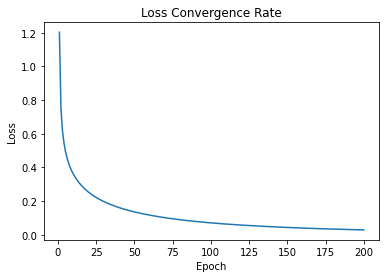

<Figure size 432x288 with 0 Axes>

In [17]:
fig, axs = plt.subplots(1,1)

axs.plot(cls.pepochs, cls.ploss)
axs.set_title("Loss Convergence Rate")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

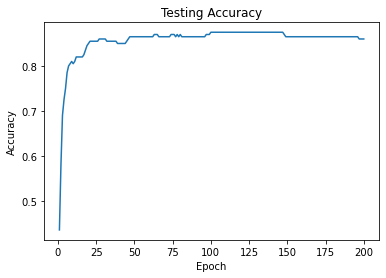

<Figure size 432x288 with 0 Axes>

In [19]:
fig2, axs2 = plt.subplots(1,1)

axs2.plot(cls.pepochs, cls.pacc)
axs2.set_title("Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()